In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

import sys
from paths import Paths
paths = Paths()
sys.path.append(paths.scripts_root)
import util

%load_ext autoreload
%autoreload 2

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

paths.print_paths()

Paths defined in paths module:
 paths.data_root: /Users/trafferty/data
 paths.notebook_root: /Users/trafferty/data/notebooks
 paths.scripts_root: /Users/trafferty/data/scripts
 paths.images_root: /Users/trafferty/data/images
 paths.projects_root: /Users/trafferty/data/projects
 paths.results_root: /Users/trafferty/data/results
 paths.tmp_root: /Users/trafferty/data/tmp
 paths.dat_root: /Users/trafferty/data/dat
 paths.tmp_dir: /Users/trafferty/tmp
 paths.ws_dir: /Users/trafferty/workspace
 paths.mii_home: /Users/trafferty/dev
 paths.inhouse: /Users/trafferty/dev/src/inhouse


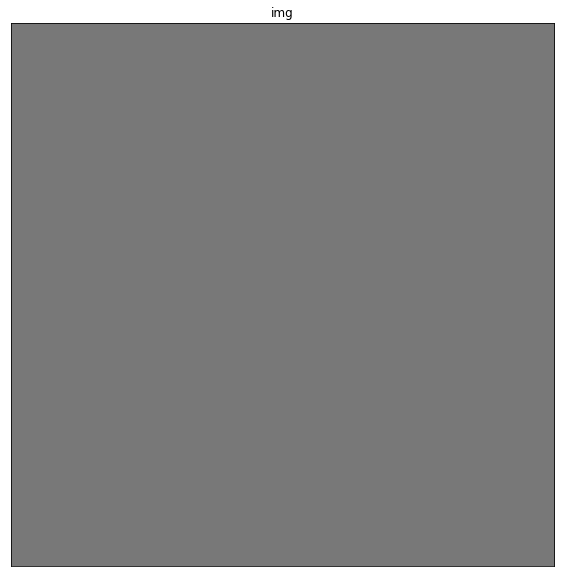

In [24]:
background_val = 120
h, w = 500, 500

img = np.ones((h,w), np.uint8)*background_val
util.plot_imgs([(img, 'img')], max_cols = 2)

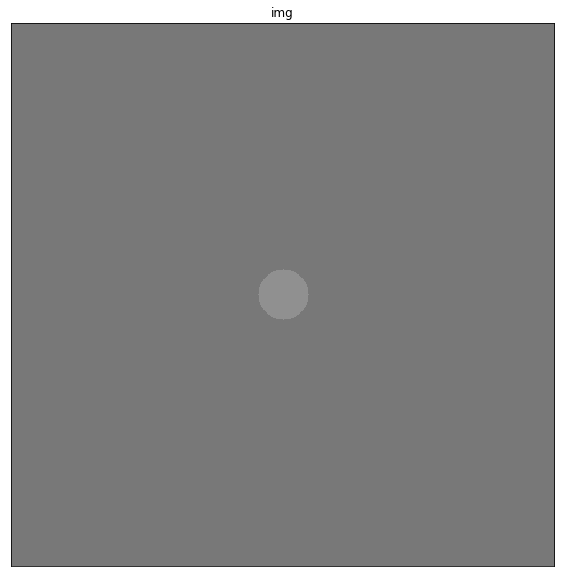

In [32]:
cp = (int(img.shape[0]/2), int(img.shape[0]/2))

cv2.circle(img, cp, 23, util.gray, -1) 

util.plot_imgs([(img, 'img')], max_cols = 2)

In [47]:
fps = 120
image_repeats = 1
background_val = 120
h, w = 1500, 1500
video_fpath = f"{paths.tmp_dir}/spread_synth_{h}x{w}_{fps}fps.avi"

frame_size = (h,w)
source_base = np.ones((h,w), np.uint8)*background_val
cp = (int(source_base.shape[0]/2), int(source_base.shape[0]/2))

video_out = cv2.VideoWriter(video_fpath, cv2.VideoWriter_fourcc(*'DIV3'), fps, (frame_size[1],frame_size[0]))

max_rad = int(np.hypot(int(h/2), int(w/2))) + 2
dias = [x for x in range(1, max_rad, 1)]
for dia in dias:
    #print("Adding dia:", dia)
    source_img = source_base.copy()
    
    cv2.circle(source_img, cp, dia, util.gray, -1) 

    source_img_color = cv2.cvtColor(source_img, cv2.COLOR_GRAY2BGR)
    for x in range(image_repeats):
        video_out.write(source_img_color)

video_out.release()

In [40]:
np.hypot(int(h/2), int(w/2))

353.5533905932738